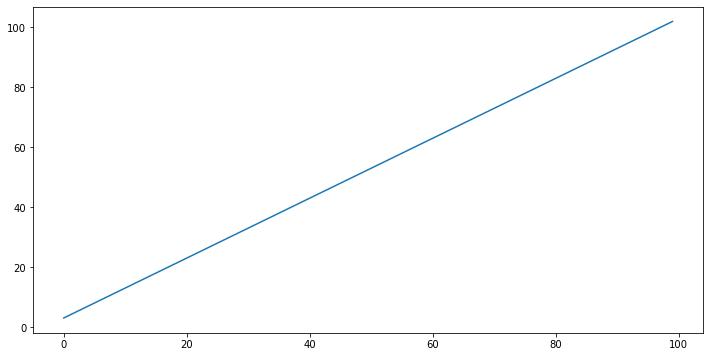

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102])

In [1]:
##lineAndRandomPoints
import numpy as np
import matplotlib.pyplot as plt

line = np.array([i + 3 for i in range(100)])
figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.show()
line

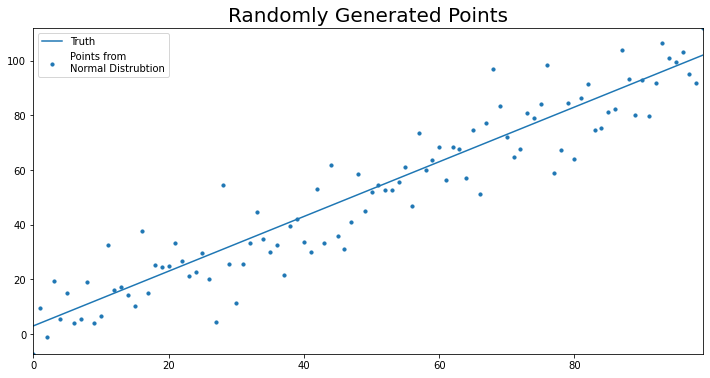

In [2]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, 10))

figure = plt.figure(figsize = (12, 6))
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.plot(line, label ="Truth")
plt.scatter(np.arange(len(points)), points, s = 10,
           label = "Points from\nNormal Distrubtion")
plt.title("Randomly Generated Points", fontsize = 20)
plt.legend(loc = "best")
plt.show()

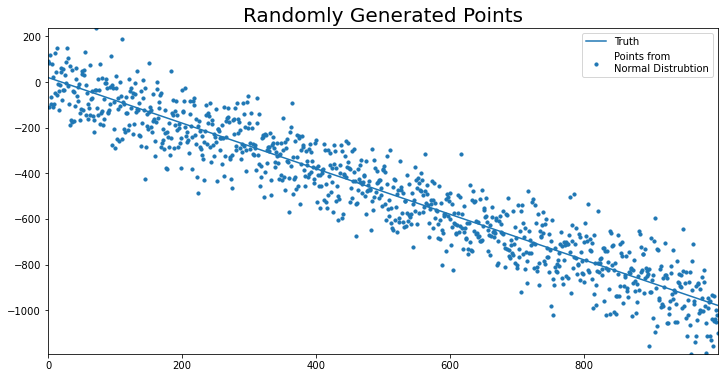

In [3]:
import random

def build_random_data_with_line(y_int, slope, SD = 1, line_length = 100):
    line = np.array([slope * i + y_int for i in range(line_length)])    
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
        
    return line, points

def plot_line(line, points, line_name = "Truth",
              title = "Randomly Generated Points"):

    figure = plt.figure(figsize = (12, 6))
    plt.rcParams["axes.xmargin"] = 0
    plt.rcParams["axes.ymargin"] = 0
    plt.plot(line, label =line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
               label = "Points from\nNormal Distrubtion")
    plt.title("Randomly Generated Points", fontsize = 20)
    plt.legend(loc = "best")
    plt.show()
    
line, points = build_random_data_with_line(y_int = 20, slope = -1, SD = 100, line_length = 1000)
plot_line(line, points)

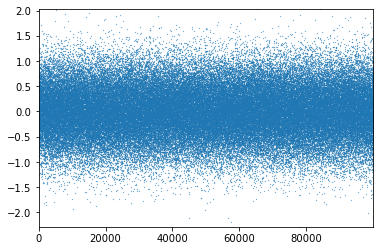

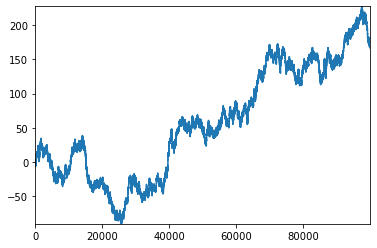

In [4]:
#montecarloSimulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


mu = 0
#SD is sigma, variance is sigma**2
sigma = .5
random_list = []
observations = 100000
for i in range(100000):
    random_list.append(random.normalvariate(mu, sigma))

plt.plot(random_list, ls = "",linewidth = 1, marker =".", markersize = .5)
plt.show()
plt.close()

simulation = [] 

for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i-1] + val)
        
plt.plot(simulation)
plt.show()
plt.close()



In [5]:
mean = 0
sigma = 1
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 1000
for i in range(num_sims):
    monte_carlo_sim_dict[i] = {}
    for period in range(periods):
        # create variable that references simulation i 
        # in the dictionary
        curr_sim = monte_carlo_sim_dict[i]
        if period == 0:
            curr_sim[period] = random.normalvariate(mean, sigma)
        else:
            curr_sim[period] = curr_sim[period - 1] + random.normalvariate(mean, sigma)
        
monte_carlo_sim_df = (pd.DataFrame(monte_carlo_sim_dict))
        
monte_carlo_sim_df

0         1          2         3          4          5          6     \
0   -1.128166 -2.168892   0.492413 -0.378914  -1.860162  -0.387600  -1.441286   
1   -0.920182 -3.244255  -0.027239 -0.687455  -1.918596  -0.531680  -1.399278   
2   -1.677686 -1.517517   0.382973 -1.065634  -0.946770  -1.135056  -2.216539   
3    0.652264 -3.146700   3.598494 -2.616337  -0.533390  -1.029525  -2.612169   
4    1.448280 -2.212928   4.580723 -2.611434   0.950626  -0.782703  -3.073556   
..        ...       ...        ...       ...        ...        ...        ...   
995 -0.754514 -7.495946  32.619915 -5.153553  31.152909 -36.629293   7.974554   
996  0.606795 -7.324667  33.043523 -5.606708  30.664846 -36.154708   8.234818   
997 -0.092518 -7.218028  32.476671 -7.710363  30.636140 -37.065980   7.874173   
998 -0.373465 -7.517580  33.978531 -7.800753  30.766802 -38.527798   9.913478   
999 -0.558788 -7.978523  35.133183 -6.293466  31.279485 -38.326759  11.744200   

          7         8         9     ...      1990       1991       1992  \
0     0.545980  0.635833  0.173384  ...  0.012442  -0.410715   1.007235   
1     0.027331 -0.433028  0.336015  ... -1.567994  -1.166567   1.107901   
2     0.567418 -2.773891 -0.085316  ... -2.016825   0.464217   1.427270   
3    -0.170121 -3.324803 -0.561678  ... -2.021239   0.644996   1.289625   
4    -0.024268 -3.594043 -0.858635  ... -0.257410   1.241799   0.877918   
..         ...       ...       ...  ...       ...        ...        ...   
995  20.043174  1.760350 -1.951072  ... -4.293936  31.691140  11.301744   
996  18.500339  1.516572 -2.787967  ... -3.189276  30.811007  11.780730   
997  19.170441  1.234410 -2.692765  ... -2.515851  30.638062  11.233544   
998  18.548403  1.219842 -1.288619  ... -1.932690  29.362863   9.893514   
999  19.470962  1.825034 -0.261362  ... -1.318776  30.587444  10.763282   

          1993      1994       1995      1996       1997       1998       1999  
0     1.107731 -1.368680   1.283101 -1.371696   0.025647  -1.388553  -0.531356  
1     0.181779  0.400045   1.831768 -3.119101  -0.746603   0.699672   0.449362  
2    -0.257158  1.825042   0.403759 -2.368220  -0.100027   0.731364   1.034028  
3     1.605017  3.227582   0.850166 -0.981773   0.820168   1.291977   1.850259  
4     2.799091  3.095796   1.938241 -1.024524   1.353977   0.940236   1.833737  
..         ...       ...        ...       ...        ...        ...        ...  
995  50.421229  1.284614  12.694000 -7.935658  11.205498  56.793062  28.379949  
996  48.650583  1.168085  12.831382 -9.324532  12.428594  56.700096  29.144488  
997  48.129597  1.124161  13.874991 -8.978727  10.995903  56.091875  29.618467  
998  46.579347 -0.052338  15.095852 -7.984095  10.920299  56.615269  30.537159  
999  46.504382 -1.741502  15.098290 -9.241854  10.507143  54.687042  28.660788  

[1000 rows x 2000 columns]

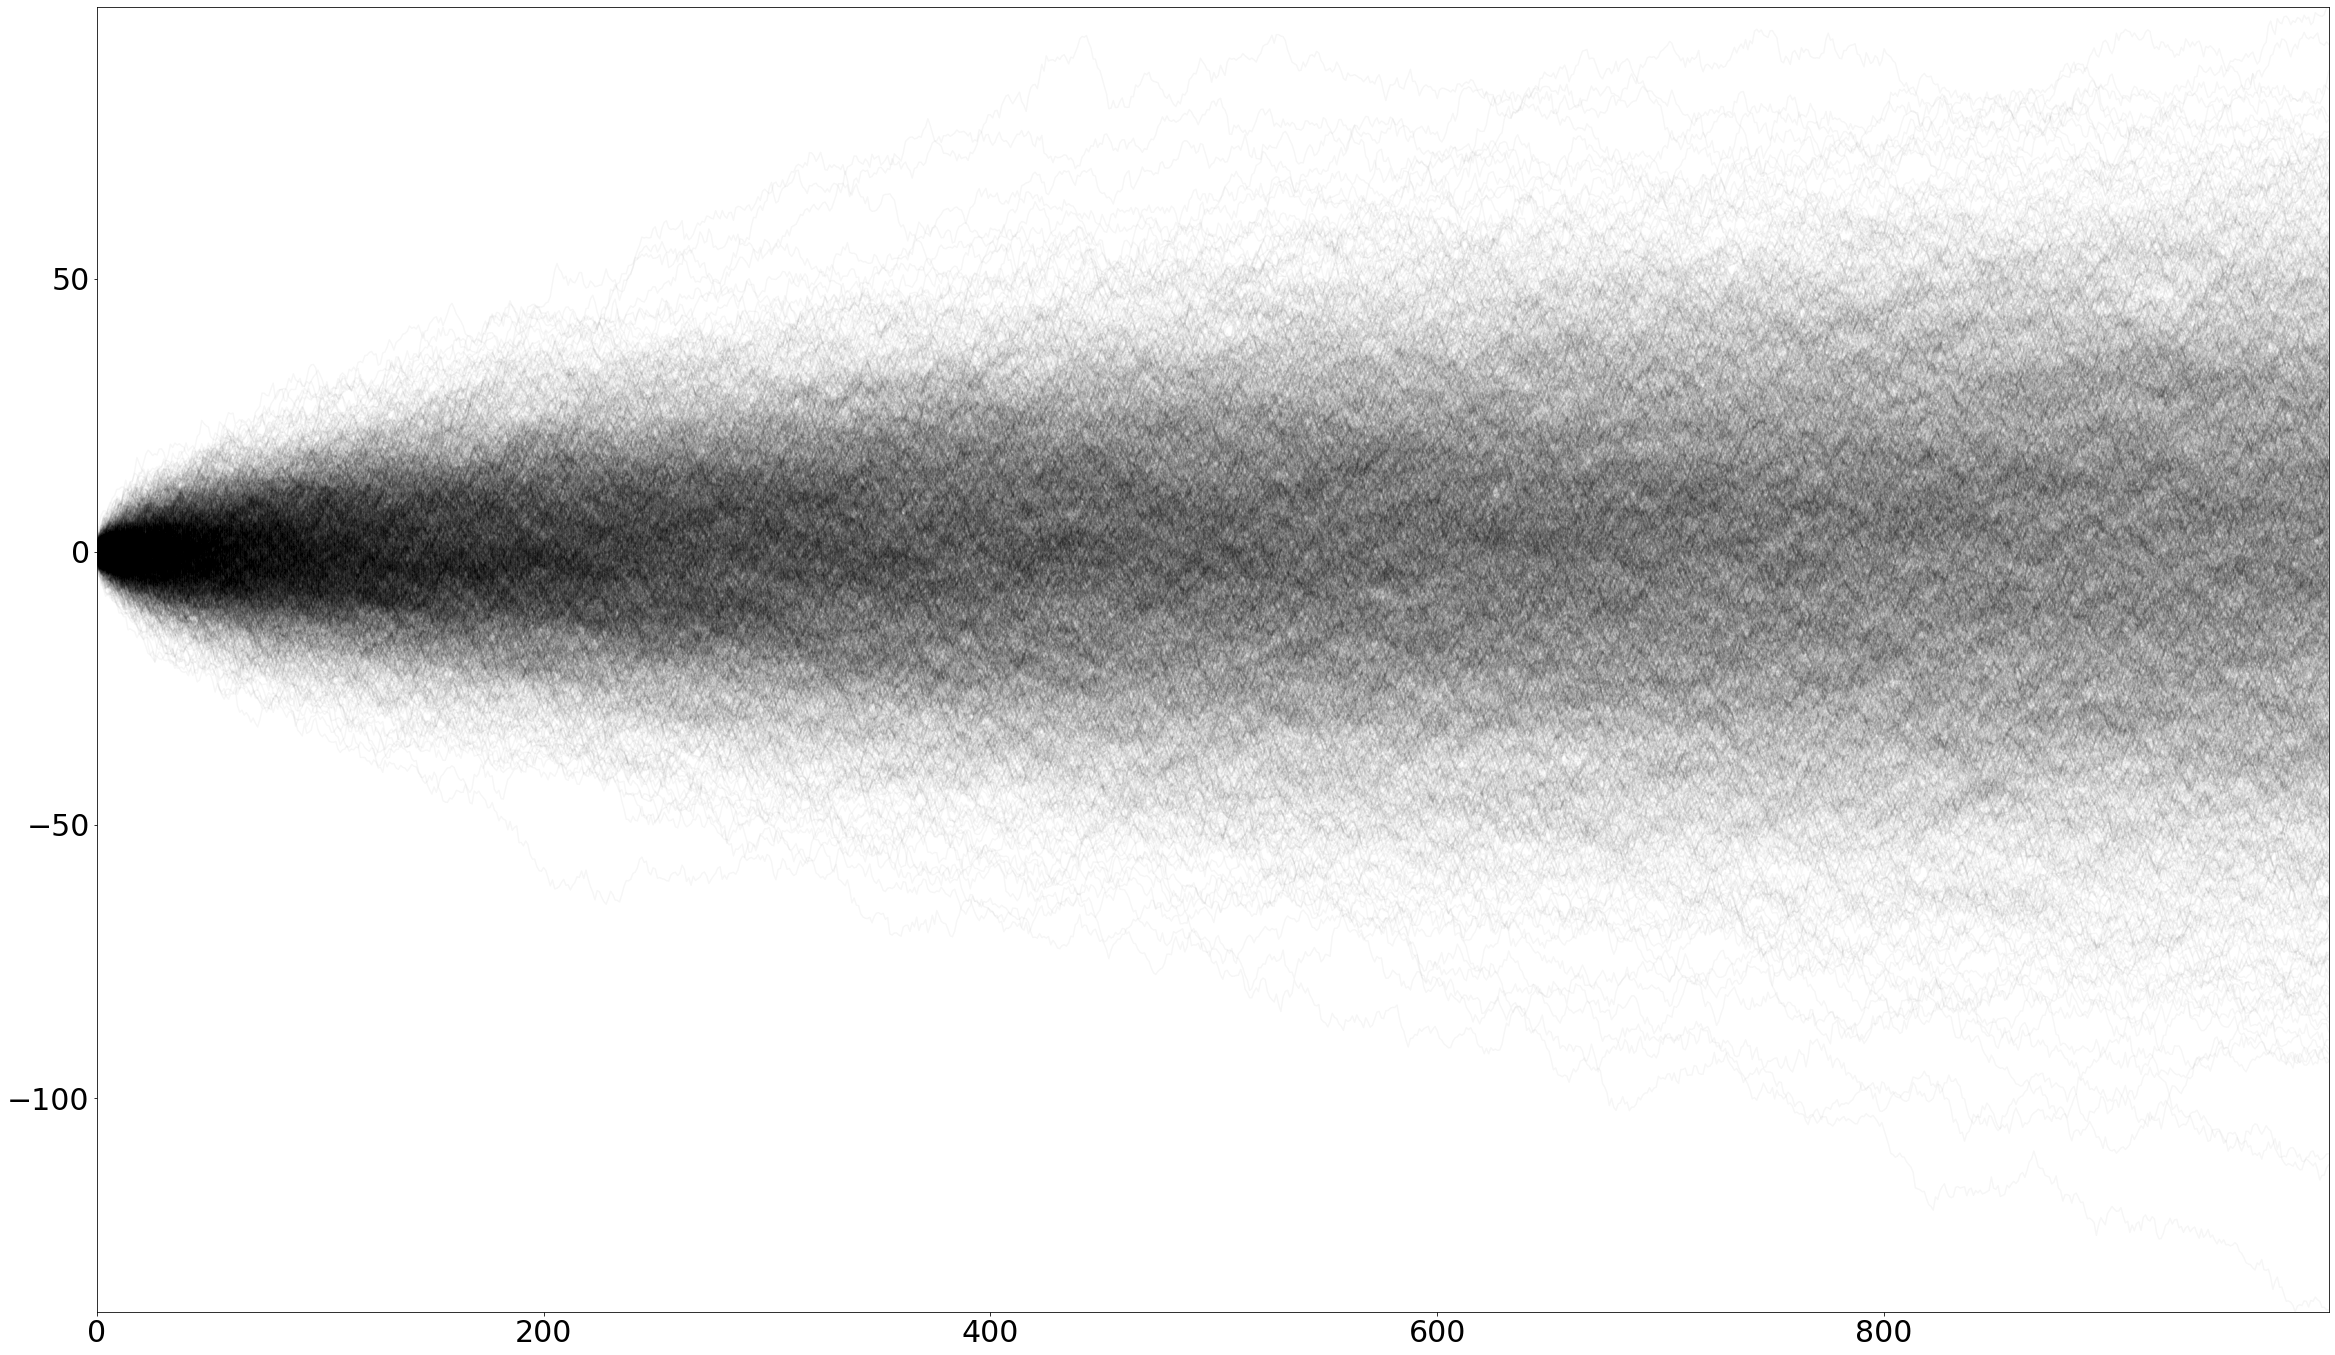

In [6]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["font.size"] = 30

fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.plot.line(legend = False, marker=".", markersize = .1, 
                            color ="k", alpha = .035, ax = ax)

plt.show()

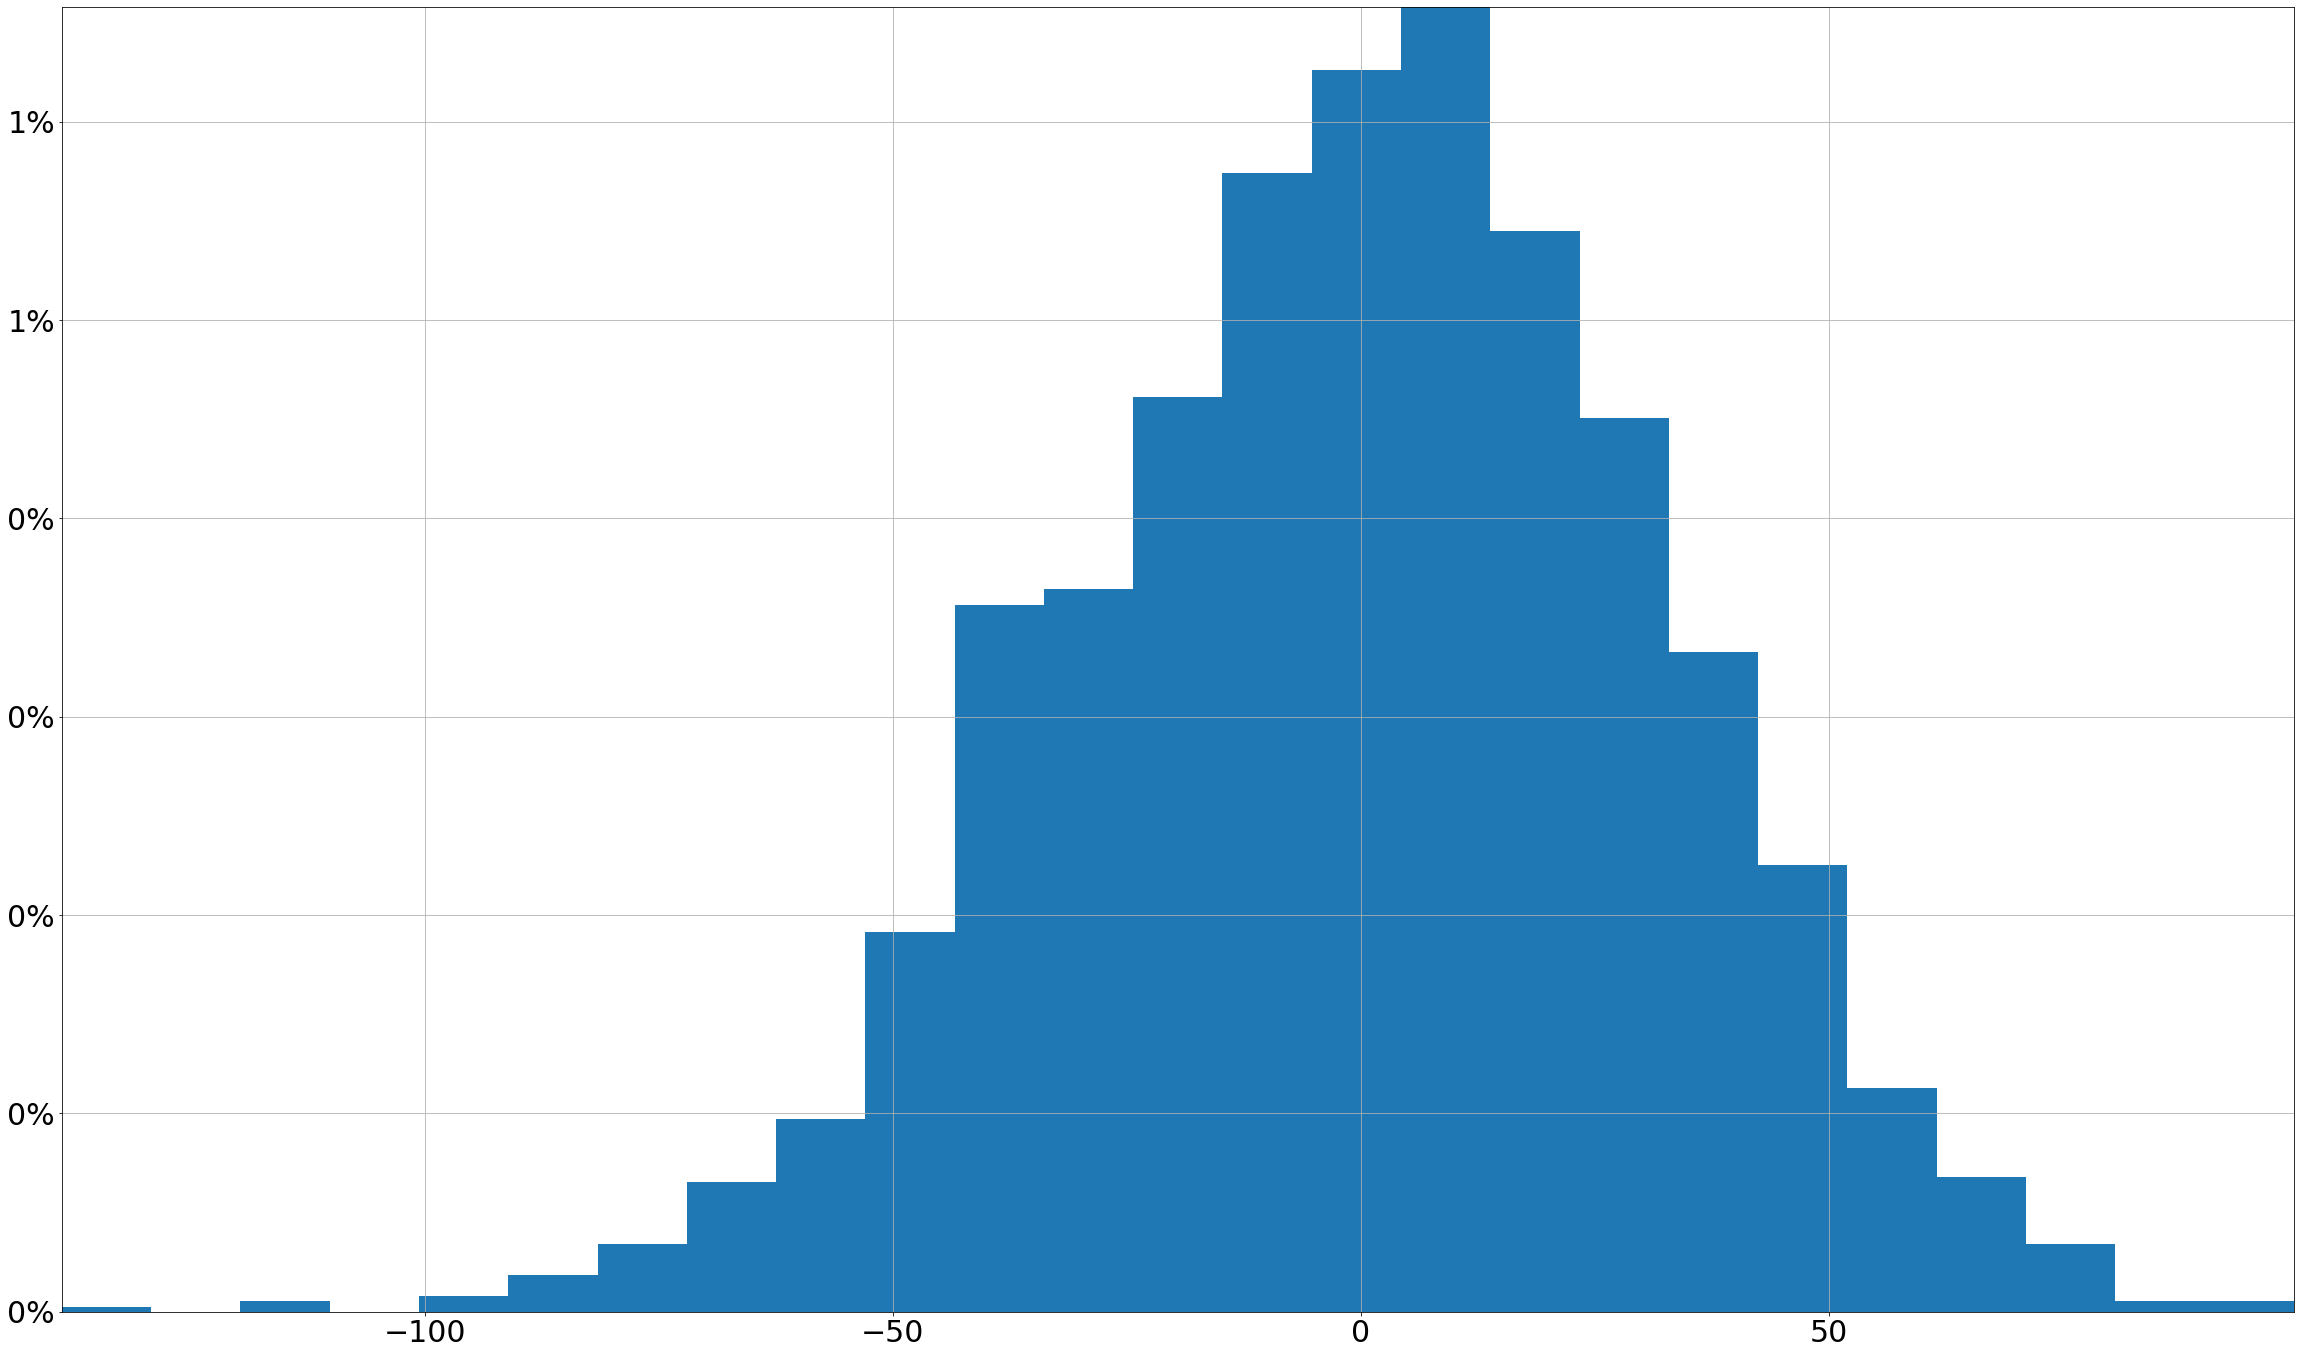

In [7]:
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.iloc[-1].hist(bins = 25, density = True,
                                ax = ax)

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
plt.show()
plt.close()

## Monte Carlo with a Positive Trend

In [8]:
mean = .05
sigma = .5
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 1000
for i in range(num_sims):
    monte_carlo_sim_dict[i] = {}
    for period in range(periods):
        # create variable that references simulation i 
        # in the dictionary
        curr_sim = monte_carlo_sim_dict[i]
        if period == 0:
            curr_sim[period] = random.normalvariate(mean, sigma)
        else:
            curr_sim[period] = curr_sim[period - 1] + random.normalvariate(mean, sigma)
        
monte_carlo_sim_df = (pd.DataFrame(monte_carlo_sim_dict))
        
monte_carlo_sim_df

0          1          2          3          4          5     \
0    -0.407062   0.646874   0.046993  -0.184103   0.530070  -0.375048   
1    -1.711075  -0.010605  -0.140697  -0.071809   0.649935  -0.291546   
2    -1.474676  -0.420234  -0.591731   0.145935   0.885202  -0.269915   
3    -1.894243   0.347392  -1.107712   0.359406   1.044776   0.553233   
4    -1.608899   0.059714  -0.936775   0.712609   0.867034   0.495307   
..         ...        ...        ...        ...        ...        ...   
995  65.169334  44.421682  52.986946  39.962501  36.923088  44.281376   
996  65.061481  44.372019  52.033670  39.900149  36.816677  45.258902   
997  66.616621  44.383647  52.710930  40.143369  36.106300  45.222790   
998  67.052005  44.437342  52.490433  40.393117  35.541820  45.769750   
999  67.650147  44.228838  52.131347  39.869395  36.386326  45.123783   

          6          7          8          9     ...       1990       1991  \
0     0.583446   0.535685  -0.230616  -0.179882  ...  -0.146562  -0.632286   
1    -0.031009  -0.002586  -1.027162  -0.796972  ...  -0.262821  -0.553568   
2    -0.320145   0.174851  -1.174561  -0.383259  ...  -0.758275  -0.598829   
3    -0.857498   0.344430  -0.572512  -0.766739  ...  -1.236277  -0.224534   
4    -0.808644  -0.578757  -1.745071  -0.691932  ...  -0.889349  -0.273985   
..         ...        ...        ...        ...  ...        ...        ...   
995  32.369524  37.542378  55.117307  44.182141  ...  67.279610  76.332484   
996  31.630489  37.071245  54.641218  44.201572  ...  67.737166  76.211051   
997  31.927503  37.140870  54.065483  44.404758  ...  67.950302  75.616103   
998  31.317174  36.873266  54.633366  43.567570  ...  68.174423  75.324115   
999  31.372860  37.053066  54.255799  42.968162  ...  68.446614  75.939265   

          1992       1993       1994       1995       1996       1997  \
0    -0.073325   0.004260  -0.866419  -0.365202  -0.571091  -0.030397   
1     0.970914   0.231582  -0.141260   0.851618  -1.500742  -0.113457   
2     0.907753  -0.060316  -0.466211   0.218507  -2.102605   0.185533   
3     0.472205   0.212795  -0.136112   0.123496  -1.383145   0.352673   
4     0.186918   0.300145   0.418210   1.196013  -2.034497   0.616914   
..         ...        ...        ...        ...        ...        ...   
995  44.938744  21.126257  32.806400  54.573429  73.368976  56.232195   
996  45.734861  20.771855  33.554805  55.157289  73.027491  56.737619   
997  45.528666  20.965907  33.797609  56.069838  73.297641  56.579680   
998  45.277656  20.318401  33.523227  56.749113  73.900181  56.474743   
999  45.782720  19.935933  32.777420  57.213870  73.698315  56.507624   

          1998       1999  
0     1.031569   0.422162  
1     0.980812   1.304226  
2     2.226486   0.905812  
3     1.780001   1.436489  
4     0.931970   1.709006  
..         ...        ...  
995  32.727168  35.586250  
996  33.181314  35.566678  
997  32.737242  35.568991  
998  32.488115  35.540841  
999  32.867872  36.005994  

[1000 rows x 2000 columns]

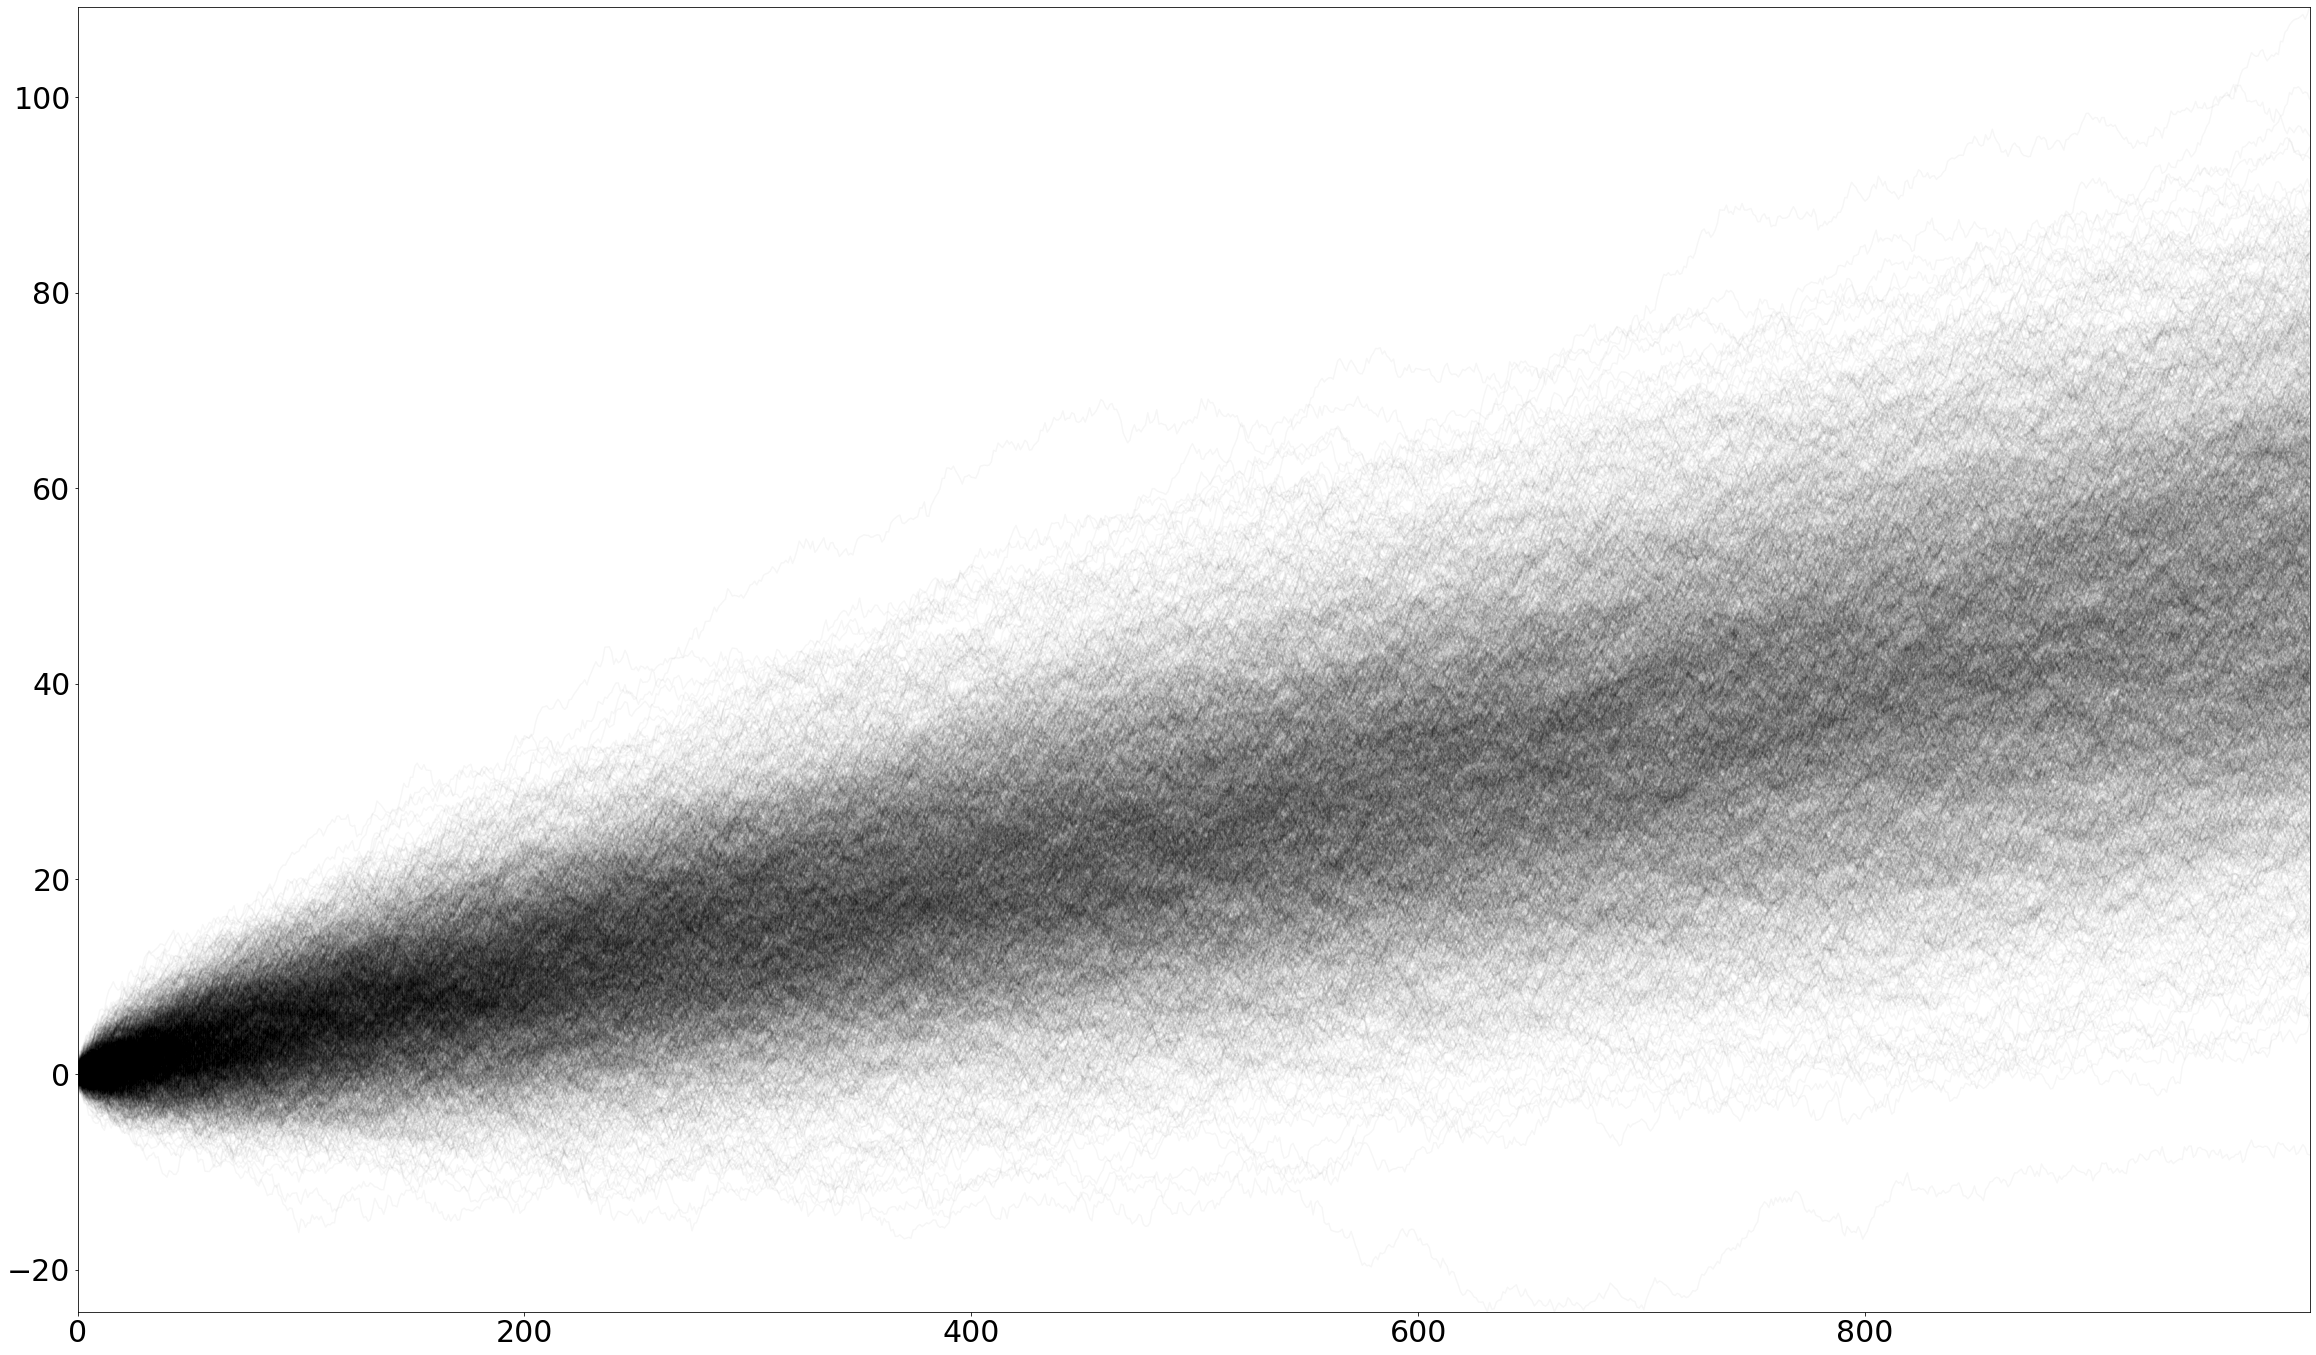

In [9]:
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.plot.line(legend = False, marker=".", markersize = .1, 
                            color ="k", alpha = .035, ax = ax)

plt.show()

### Calculating Expected Value

In [10]:
monte_carlo_sim_df["mean"] = monte_carlo_sim_df.mean(axis = 1)
monte_carlo_sim_df["mean"]

0       0.071498
1       0.133107
2       0.188377
3       0.234389
4       0.267624
         ...    
995    49.530802
996    49.568377
997    49.618280
998    49.667278
999    49.700368
Name: mean, Length: 1000, dtype: float64

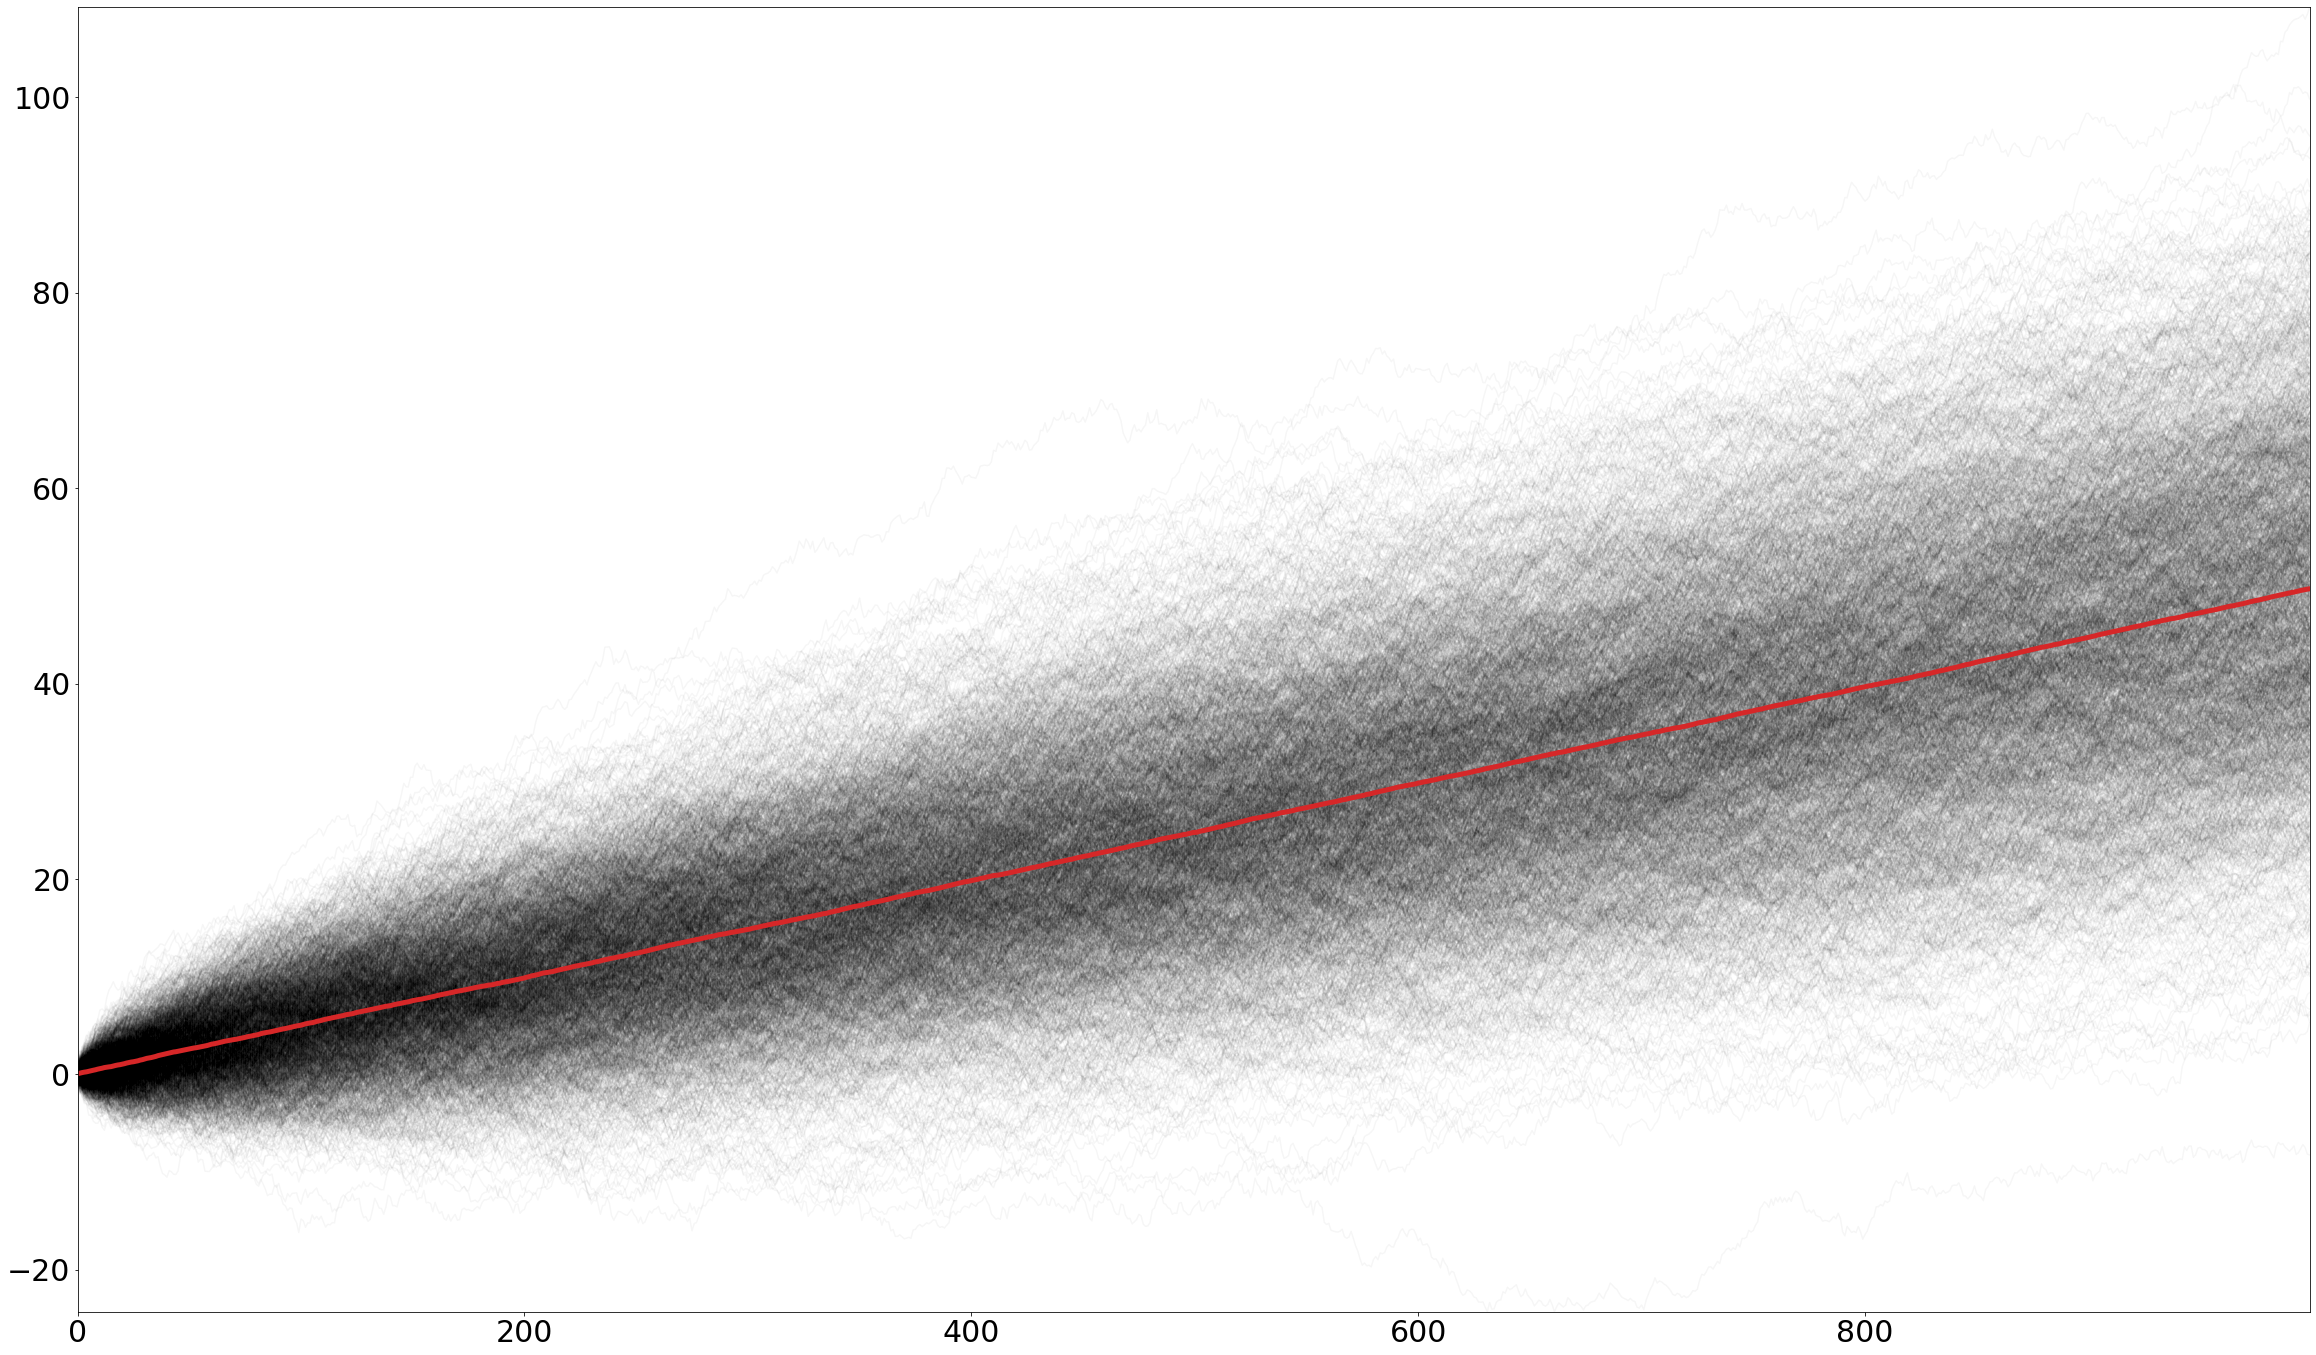

In [11]:
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.drop("mean", inplace = False, axis = 1).plot.line(legend = False, marker=".", markersize = .1, 
                            color ="k", alpha = .035, ax = ax)
monte_carlo_sim_df["mean"].plot.line(legend = False, color ="C3", linewidth = 5, ax = ax)
plt.show()

In [12]:
### Simulating Changes in Portfolio Values

In [13]:
import pandas_datareader.data as web
import datetime

# date is format (yyyy, mm, dd)
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "IBM", "GOOG"]
for name in stocks:
    # web.DataReader(stockname, source, start_date, end_date)
    data_dict[name] = web.DataReader(name, "yahoo", start, end)
    
    
# make a list of the close data for each stock
close_data_dict = {key:val["Close"] for key, val in data_dict.items()}
close_data_df = pd.DataFrame(close_data_dict)

In [14]:
close_data_pct_change = close_data_df.pct_change()
close_data_pct_change

MSFT      AAPL       IBM      GOOG
Date                                              
2005-01-03       NaN       NaN       NaN       NaN
2005-01-04  0.003740  0.010270 -0.010742 -0.040501
2005-01-05 -0.002235  0.008758 -0.002068 -0.005090
2005-01-06 -0.001120  0.000775 -0.003109 -0.025632
2005-01-07 -0.002991  0.072812 -0.004366  0.028109
...              ...       ...       ...       ...
2020-12-02 -0.003885  0.002934  0.011854  0.016601
2020-12-03 -0.005247 -0.001137 -0.008105 -0.000645
2020-12-04  0.000560 -0.005613  0.029043  0.000668
2020-12-07 -0.000327  0.012270 -0.019654 -0.004655
2020-12-08  0.008027  0.005091  0.008099 -0.000511

[4012 rows x 4 columns]

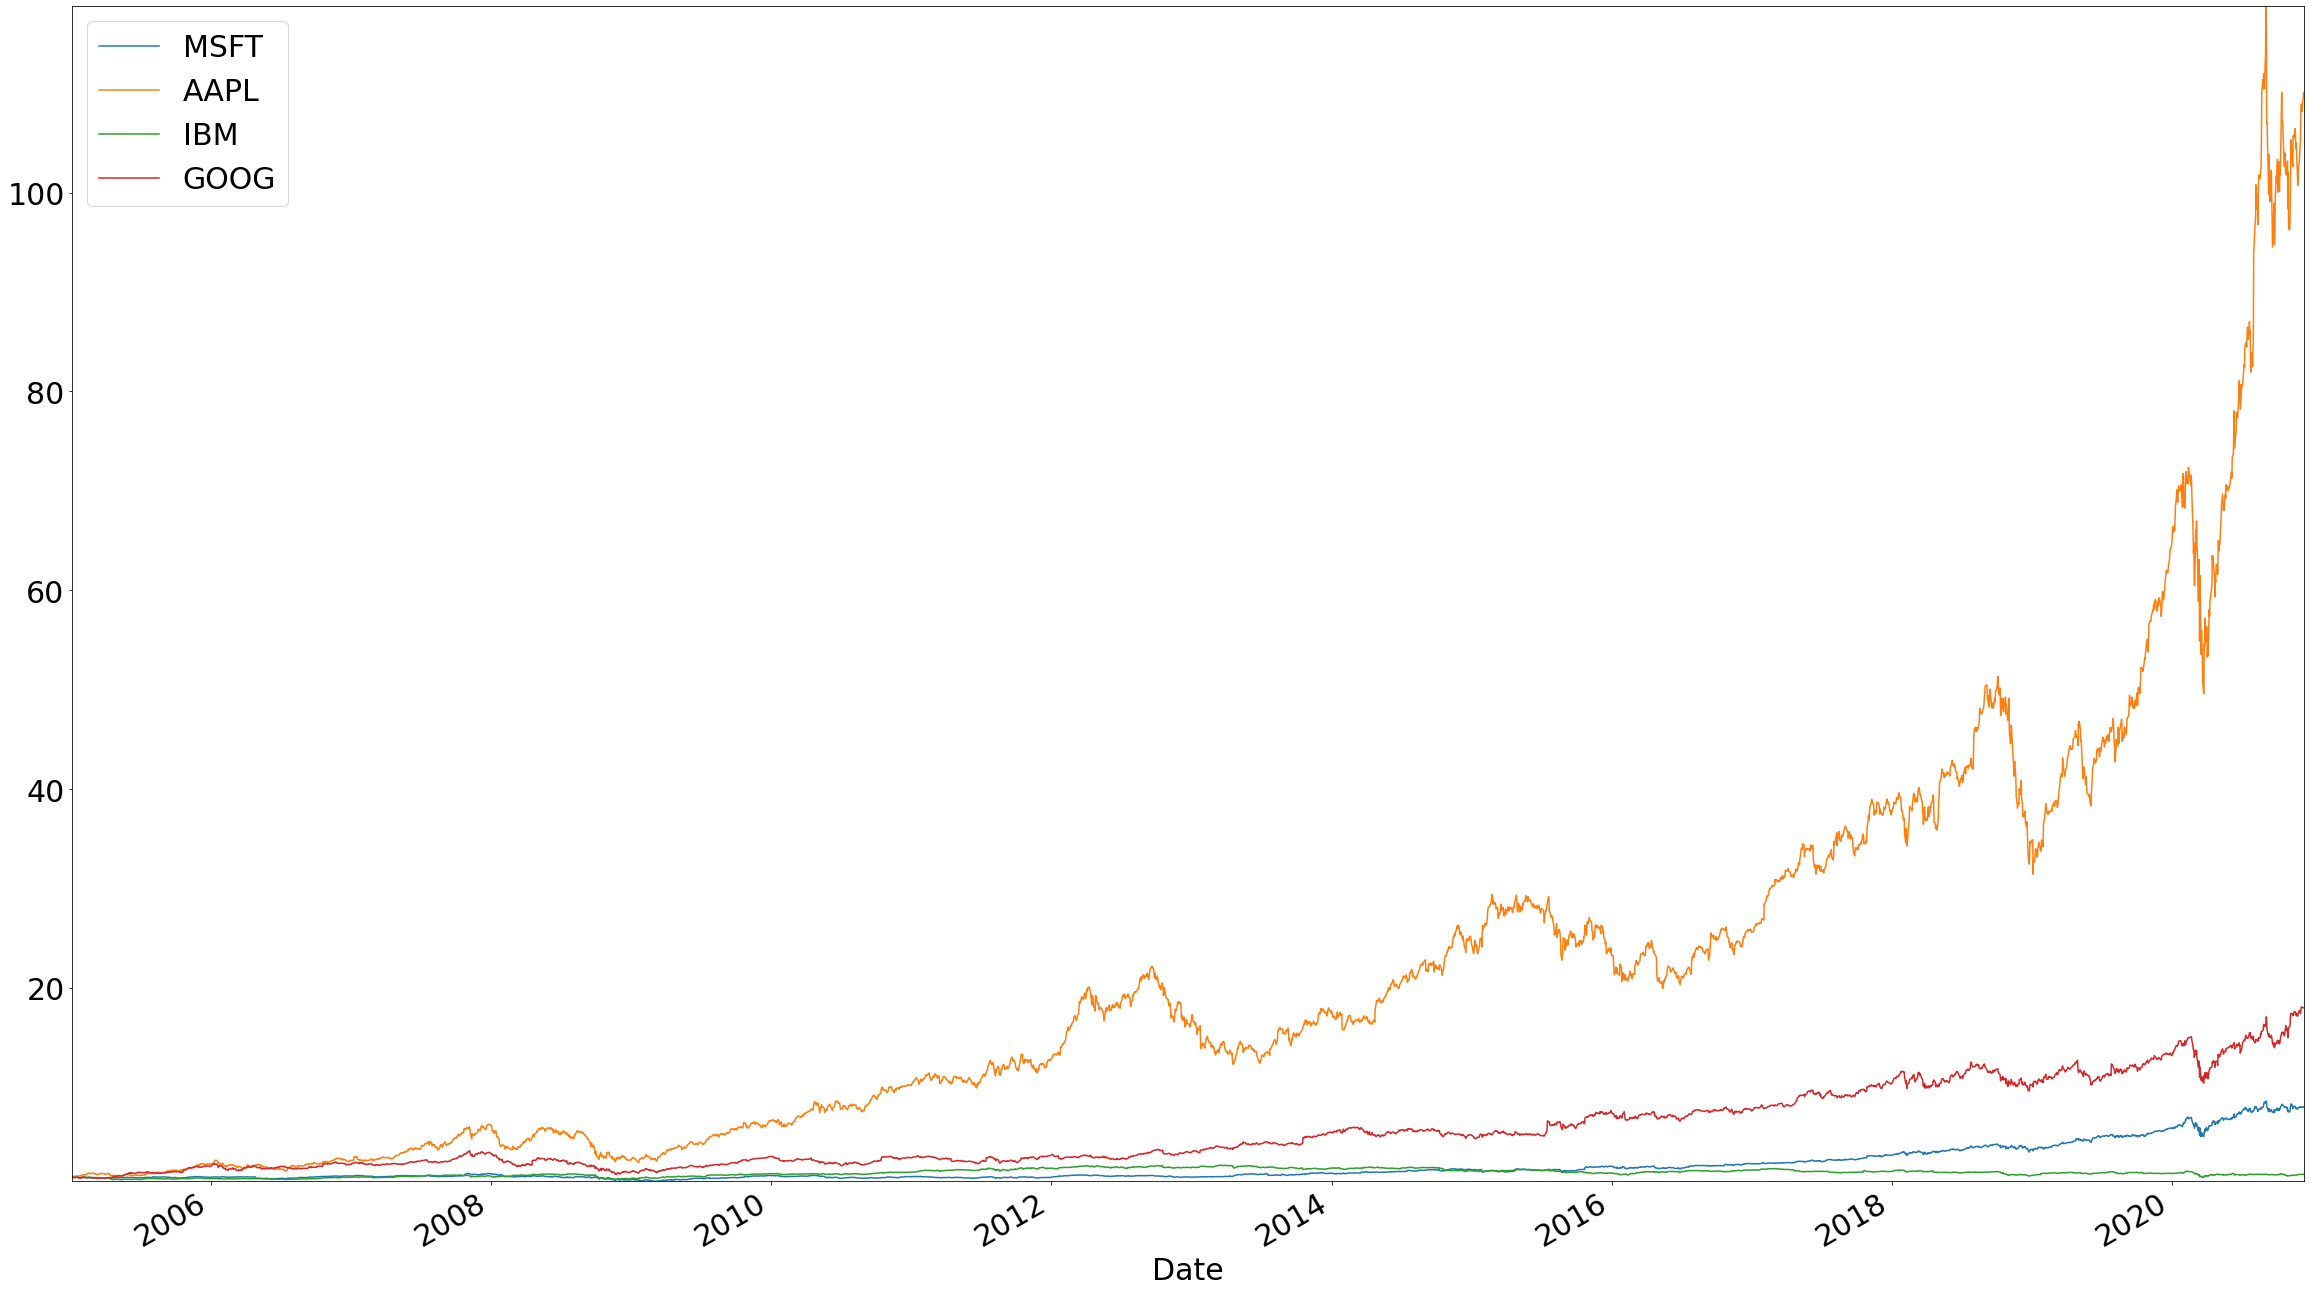

In [15]:
close_data_normalized = close_data_pct_change.add(1).cumprod()
close_data_normalized.fillna(1, inplace = True)
fig, ax = plt.subplots(figsize=(40,24))
close_data_normalized.plot.line(ax=ax)


### Daily Rate of Return

Derive the daily rate of return from the present value equation.

>$PV = \frac{FV}{(1 + r)^t}$
>
>Overall rate of return: $R=\frac{FV}{PV}$

Discount the overall rate of return to find the average rate of return. We will use this to define the mean of the standard normal distribution:

>$ r = (R)^{\frac{1}{t}} - 1$
>
>$t$ is measured in days

In [16]:
from pypfopt import risk_models, expected_returns
mean_var_df = pd.DataFrame({"mean": close_data_normalized.iloc[-1].div(close_data_normalized.iloc[0]) ** (1 / close_data_normalized["MSFT"].count()) - 1,
                            "sigma":close_data_pct_change.std()})

mean_var_df

ModuleNotFoundError: No module named 'pypfopt'

In [ ]:
num_sims = 500
dates = list(close_data_df.index)
monte_carlo_sim_dict = {}
for stock in stocks:
    monte_carlo_sim_dict[stock] = {}
    mean = mean_var_df["mean"][stock]
    sigma = mean_var_df["sigma"][stock] 
    for i in range(num_sims):
        monte_carlo_sim_dict[stock][i] = {}
        curr_sim = monte_carlo_sim_dict[stock][i]

        for date in dates:
            # create variable that references simulation i 
            # in the dictionary
            curr_sim[date] = random.normalvariate(mean, sigma)
            
    monte_carlo_sim_dict[stock] = pd.DataFrame(monte_carlo_sim_dict[stock]).add(1).cumprod()
monte_carlo_sim_dict

In [ ]:
for stock in stocks:
    monte_carlo_sim_dict[stock]["mean"] = monte_carlo_sim_dict[stock].mean(axis=1)
    fig, ax = plt.subplots(figsize = (40, 24))
    monte_carlo_sim_dict[stock].drop("mean", inplace = False, axis = 1).plot.line(legend = False, marker=".", markersize = .1, 
                                color ="k", alpha = .05, logy = True, ax = ax)
    close_data_normalized[stock].plot.line(legend = False, color ="C2", linewidth = 5, logy = True, ax = ax, label = "Observed")
    monte_carlo_sim_dict[stock]["mean"].plot.line(legend = False, color ="C3", linewidth = 5, logy = True, ax = ax)
    
    # find lowest
    obs_text_x = close_data_normalized[close_data_normalized[stock] == close_data_normalized[stock].min()].index
    plt.text(obs_text_x, close_data_normalized[stock].loc[obs_text_x] * .7 , 
         "Observed", fontsize = 70, color = "C2")
    plt.text(dates[-400], monte_carlo_sim_dict[stock]["mean"].iloc[-400] * 1.35 , 
         "Mean", fontsize = 70, color = "C3")
    
    plt.title(stock, fontsize = 50)
    plt.show()
    plt.close()

In [ ]:
## Calculate Portfolio Return

In [ ]:
portfolio_weights = {stock: 1 / len(stocks) for stock in stocks}
portfolio_weights

In [ ]:
ex_return  = pd.DataFrame(close_data_normalized.apply(lambda x: x.mul(portfolio_weights[x.name]), axis = 0).sum(axis = 1), 
                         columns = ["Portfolio Return"])
ex_return

In [ ]:
ex_return_pct_change = ex_return.pct_change()
ex_return_pct_change.dropna(inplace = True)
ex_return_pct_change

In [ ]:
mean_var_df = pd.DataFrame({"mean": (ex_return.iloc[-1] / ex_return.iloc[0]) ** (1 / ex_return["Portfolio Return"].count()) - 1,
                           "sigma":ex_return_pct_change.std()})
mean_var_df

In [ ]:
num_sims = 1000
dates = ex_return.index
monte_carlo_sim_dict = {}
mean = mean_var_df["mean"]["Portfolio Return"]
sigma = mean_var_df["sigma"]["Portfolio Return"]


for i in range(num_sims):
    monte_carlo_sim_dict[i] = {}
    curr_sim = monte_carlo_sim_dict[i]
    for date in dates:
        # create variable that references simulation i 
        # in the dictionary
        curr_sim[date] = random.normalvariate(mean, sigma)

monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).add(1).cumprod()
monte_carlo_sim_df

In [ ]:
monte_carlo_sim_df["mean"] = monte_carlo_sim_df.mean(axis=1)
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.drop("mean", inplace = False, axis = 1).plot.line(
                            legend = False, marker=".", markersize = .1, 
                            color ="k", alpha = .035, logy = True, ax = ax)
ex_return.plot.line(legend = False, color ="C2", linewidth = 5, logy = True, 
                    ax = ax)
plt.text(dates[-1000], ex_return["Portfolio Return"].iloc[-1000] * .75 , 
         "Observed", fontsize = 70, color = "C2")
monte_carlo_sim_df["mean"].plot.line(legend = False, color ="C3", 
                                     linewidth = 5, 
                                     logy = True, ax = ax)
plt.text(dates[-500], monte_carlo_sim_df["mean"].iloc[-500] * 1.3, "Mean", 
          fontsize = 70, color = "C3")

plt.title("Portfolio Return", fontsize = 50)
plt.show()
plt.close()